---

# Instructions

# Chargement des modules

In [74]:
# Ecrivez votre code ci-dessous
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Données

## Source des données

Base portant sur le credit scoring :
https://www.kaggle.com/kashnitsky/mlcourse?select=credit_scoring_sample.csv

## Chargement des données 

In [75]:
df = pd.read_csv('data\credit_scoring_sample.csv')



# Première analyse

## Affichage de lignes du DataFrame 

Afficher les premières lignes du DataFrame :

In [76]:
df.head()


,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


Les dernières lignes :

In [77]:
last_rows = df.tail(5)
last_rows.head()


,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
45058,1,31,0,0.824725,0,0,3000.0,1.0
45059,0,49,0,6530.000000,0,0,0.0,5.0
45060,1,38,0,0.475841,0,0,3000.0,2.0
45061,0,47,1,0.485198,0,0,11720.0,5.0
45062,1,45,2,0.802982,0,0,9120.0,2.0


Ainsi que des lignes prises au hasard :

In [78]:
df_aleatoire = df.sample(n=5)
df_aleatoire.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
39881,1,62,0,0.443828,0,0,6666.0,3.0
39996,0,45,0,0.462022,0,0,8583.0,2.0
9658,0,48,0,0.399238,0,0,5249.0,1.0
14599,0,48,0,0.178549,0,0,4782.0,1.0
18931,0,50,0,0.611680,0,0,2636.0,1.0


## Caractéristiques des colonnes 

Vérifier le type des colonnes de ce DataFrame

In [79]:
df.dtypes


SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object


On remarque que les variables de cette base de données sont principalement de deux types, entiers (int) ou flottants (float).
Pour rendre les analyses futures plus évidentes, un changement de nom de certaines variables est nécessaire. La première variable 'SeriousDlqin2yrs' sera renommée  'Client_Qualite', la variable 'NumberOfTime30-59DaysPastDueNotWorse' deviendra la variable 'retard_30_59_jours', la variable 'NumberOfTime60-89DaysPastDueNotWorse'
sera 'retard_60_89_jours' et enfin la variable 'NumberOfDependents' deviendra la variable 'Nbre_de_personnes_a_charge'.
Par ailleurs, la variable renommée 'Client_Qualite' sera transformée en variable catégorielle binaire pour faciliter les croisements car c'est une modalité.


# Nettoyage et traitement des données 

In [80]:
df=df.rename(columns={"SeriousDlqin2yrs": "Client_Qualite", "NumberOfTime30-59DaysPastDueNotWorse": "retard_30_59_jours","NumberOfTime60-89DaysPastDueNotWorse": "retard_60_89_jours", "NumberOfDependents":"Nbre_de_personnes_a_charge"  })
df.head()

,Client_Qualite,age,retard_30_59_jours,DebtRatio,NumberOfTimes90DaysLate,retard_60_89_jours,MonthlyIncome,Nbre_de_personnes_a_charge
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [81]:
df.shape

(45063, 8)

La table de données contient 8 colonnes et 45063 lignes

In [82]:
# Dans cette partie, nous éliminons les outliers des variables retard_30_59_jours et retard_60_89_jours
df = df.drop(df[df.retard_30_59_jours == 98].index)
df = df.drop(df[df.retard_60_89_jours == 98].index)
df = df.drop(df[df.retard_30_59_jours == 96].index)
df = df.drop(df[df.retard_60_89_jours == 96].index)

In [83]:
df.shape

(44885, 8)

On remarque une diminution dans le nombre de lignes qui n'est pas significative et donc n'impactera pas les analyses. 

In [84]:
# On traitera aussi la variable MonthlyIncome en considérant les déciles les plus extrèmes (10% et 90%) 
print(df['MonthlyIncome'].quantile(0.10))
print(df['MonthlyIncome'].quantile(0.90))

2000.0
11311.600000000006


In [85]:
# On éliminera les outliers suivant les déciles ci dessus
df = df.drop(df[df.MonthlyIncome <2000].index)
df = df.drop(df[df.MonthlyIncome >11311.600000000006].index)

In [86]:
df.shape

(37829, 8)

In [87]:
print(df['DebtRatio'].quantile(0.10))
print(df['DebtRatio'].quantile(0.90))

0.04398400000000001
1402.0


In [88]:
df = df.drop(df[df.DebtRatio <0.04398400000000001].index)
df = df.drop(df[df.DebtRatio >1402.0].index)

In [89]:
df.shape

(30264, 8)

In [90]:
# Identification des valeurs manquantes 
df.isnull().sum(axis=0)

Client_Qualite                   0
age                              0
retard_30_59_jours               0
DebtRatio                        0
NumberOfTimes90DaysLate          0
retard_60_89_jours               0
MonthlyIncome                 4343
Nbre_de_personnes_a_charge     688
dtype: int64

On remarque que les variables MonthlyIncome et NumberOfDependents contiennent des valeurs manquantes. 
On choisit l'approche qui consiste à supprimer les données comme la base de données a un grand nombre d'observations.  

In [91]:
df=df.dropna()
df.head()

,Client_Qualite,age,retard_30_59_jours,DebtRatio,NumberOfTimes90DaysLate,retard_60_89_jours,MonthlyIncome,Nbre_de_personnes_a_charge
0,0,64,0,0.249908,0,0,8158.0,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
5,0,55,0,0.324678,0,0,8934.0,0.0
6,0,25,0,0.473421,0,0,2200.0,0.0
8,1,37,2,0.233710,0,0,7166.0,0.0


In [92]:
df.shape

(25921, 8)

Après traitement des outliers et des valeurs manquantes, il reste 25921 lignes et 8 colonnes. 

In [93]:
labels= ["Bon","Mauvais"]
df['Client_Qualite_Recode'] = pd.cut(df['Client_Qualite'], bins=2, labels=labels)
df.head()

,Client_Qualite,age,retard_30_59_jours,DebtRatio,NumberOfTimes90DaysLate,retard_60_89_jours,MonthlyIncome,Nbre_de_personnes_a_charge,Client_Qualite_Recode
0,0,64,0,0.249908,0,0,8158.0,0.0,Bon
2,0,41,0,0.456127,0,0,6666.0,0.0,Bon
5,0,55,0,0.324678,0,0,8934.0,0.0,Bon
6,0,25,0,0.473421,0,0,2200.0,0.0,Bon
8,1,37,2,0.233710,0,0,7166.0,0.0,Mauvais


On a transformé la variable Client_Qualite en variable catégorielle binaire où 0 indique maintenant Bon et 1 indique Mauvais.

In [94]:
# Description de la variable age
df['age'].describe()

count    25921.000000
mean        49.720535
std         13.245290
min         21.000000
25%         40.000000
50%         49.000000
75%         59.000000
max         99.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

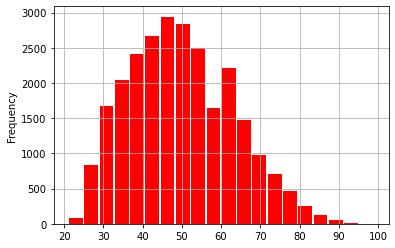

In [95]:
df['age'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='red')

- L'Histogramme ci dessus donne des pistes pour le découpage de la variable age
- Catégories choisies\
[20-39] [40-51] [52-60] [60 et plus]

In [96]:
bins = [20, 39, 51, 60, np.inf]
labels=['20-39', '40-51', '52-60', '60 et plus' ]
df['Age_Categorie'] = pd.cut(df.age, bins, right=False, labels=labels)
df.head()

,Client_Qualite,age,retard_30_59_jours,DebtRatio,NumberOfTimes90DaysLate,retard_60_89_jours,MonthlyIncome,Nbre_de_personnes_a_charge,Client_Qualite_Recode,Age_Categorie
0,0,64,0,0.249908,0,0,8158.0,0.0,Bon,60 et plus
2,0,41,0,0.456127,0,0,6666.0,0.0,Bon,40-51
5,0,55,0,0.324678,0,0,8934.0,0.0,Bon,52-60
6,0,25,0,0.473421,0,0,2200.0,0.0,Bon,20-39
8,1,37,2,0.233710,0,0,7166.0,0.0,Mauvais,20-39


<AxesSubplot:ylabel='Frequency'>

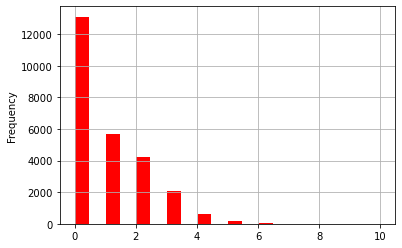

In [97]:
df['Nbre_de_personnes_a_charge'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='red')

In [98]:
bins = [0, 2, 4, np.inf]
labels=['0-2', '3-4', '4-10']
df['Nbre_de_personnes_a_charge_Categorie'] = pd.cut(df.Nbre_de_personnes_a_charge, bins, right=False, labels=labels)
df.head()

,Client_Qualite,age,retard_30_59_jours,DebtRatio,NumberOfTimes90DaysLate,retard_60_89_jours,MonthlyIncome,Nbre_de_personnes_a_charge,Client_Qualite_Recode,Age_Categorie,Nbre_de_personnes_a_charge_Categorie
0,0,64,0,0.249908,0,0,8158.0,0.0,Bon,60 et plus,0-2
2,0,41,0,0.456127,0,0,6666.0,0.0,Bon,40-51,0-2
5,0,55,0,0.324678,0,0,8934.0,0.0,Bon,52-60,0-2
6,0,25,0,0.473421,0,0,2200.0,0.0,Bon,20-39,0-2
8,1,37,2,0.233710,0,0,7166.0,0.0,Mauvais,20-39,0-2


# Analyse approfondie

## Analyse des statistiques descriptives

Affichage les statistiques descriptives de ce DataFrame

In [99]:
df.describe()


,Client_Qualite,age,retard_30_59_jours,DebtRatio,NumberOfTimes90DaysLate,retard_60_89_jours,MonthlyIncome,Nbre_de_personnes_a_charge
count,25921.000000,25921.000000,25921.000000,25921.000000,25921.000000,25921.000000,25921.000000,25921.000000
mean,0.241349,49.720535,0.432044,0.421136,0.197485,0.137610,5646.938814,0.923383
std,0.427910,13.245290,0.963503,0.782650,0.744426,0.498228,2383.420167,1.161328
min,0.000000,21.000000,0.000000,0.043996,0.000000,0.000000,2000.000000,0.000000
25%,0.000000,40.000000,0.000000,0.205082,0.000000,0.000000,3701.000000,0.000000
50%,0.000000,49.000000,0.000000,0.341340,0.000000,0.000000,5246.000000,0.000000
75%,0.000000,59.000000,0.000000,0.520080,0.000000,0.000000,7342.000000,2.000000
max,1.000000,99.000000,12.000000,95.300922,17.000000,8.000000,11308.000000,10.000000


Commentaires : 

- L'age moyen des clients est de 49.720535 ans;


- Le revenu mensuel moyen (Monthly income) est de 5646.938814;

- La personne qui a le revenu mensuel le plus faible de la distribution a un revenu de 2000.000000 et celle qui a le revenu mensuel le plus élevé perçoit 11308.000000;

- Le nombre de personnes à charge le plus élevé est de 10 personnes;

- Le ratio d'endettement (debt ratio) moyen est de 0.432044.


In [100]:
df_qualite= df['Client_Qualite_Recode']
pd.value_counts(df_qualite)

Bon        19665
Mauvais     6256
Name: Client_Qualite_Recode, dtype: int64

On remarque qu'il y a beaucoup plus de bons clients dans la base de données que de mauvais clients. Il y a donc un nombre important de clients qui n'ont pas accumulé de retards dans 90 jours dans leur remboursement durant les deux dernieres années. 

In [101]:
df3= df['Age_Categorie']
pd.value_counts(df3)

40-51         8424
60 et plus    6271
20-39         5760
52-60         5466
Name: Age_Categorie, dtype: int64

La majorité des clients ont entre 40 et 51 ans.

In [102]:
df4= df['Nbre_de_personnes_a_charge_Categorie']
pd.value_counts(df4)

0-2     18775
3-4      6313
4-10      833
Name: Nbre_de_personnes_a_charge_Categorie, dtype: int64

La majorité des clients ont entre 0 à 2 personnes à charge.

# Croisements

In [103]:
#Croisement Age et Qualité du client 
df_croisement_1=pd.crosstab(df['Age_Categorie'],df['Client_Qualite_Recode'])
df_croisement_1

Client_Qualite_Recode,Bon,Mauvais
Age_Categorie,,
20-39,3979,1781
40-51,6114,2310
52-60,4195,1271
60 et plus,5377,894


On remarque une préponderance de bons clients dans toutes les catégries d'ages.  Et les mauvais clients ont en forte majorité entre 40 et 51 ans.

In [104]:
#Croisement entre Nombre de personnes à charge et Qualité du Client
df_croisement=pd.crosstab(df['Nbre_de_personnes_a_charge_Categorie'],df['Client_Qualite_Recode'])
df_croisement 

Client_Qualite_Recode,Bon,Mauvais
Nbre_de_personnes_a_charge_Categorie,,
0-2,14582,4193
3-4,4550,1763
4-10,533,300


La plupart des clients ayant entre 0 à 2 personnes à charge sont des Bons clients. Mais aussi, la majorité des mauvais clients ont entre 0 à 2 personnes à charge.

In [105]:
# Correlations entre variables continues de la table de données
df_correlation= df[['age', 'retard_30_59_jours', 'retard_60_89_jours', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'Nbre_de_personnes_a_charge']]
corrMatrix = df_correlation.corr()
corrMatrix

,age,retard_30_59_jours,retard_60_89_jours,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,Nbre_de_personnes_a_charge
age,1.000000,-0.059181,-0.071623,0.023185,0.104300,-0.081438,-0.214703
retard_30_59_jours,-0.059181,1.000000,0.334404,0.074832,-0.043084,0.252665,0.060616
retard_60_89_jours,-0.071623,0.334404,1.000000,0.069218,-0.068671,0.343429,0.057429
DebtRatio,0.023185,0.074832,0.069218,1.000000,-0.070944,0.005793,0.004889
MonthlyIncome,0.104300,-0.043084,-0.068671,-0.070944,1.000000,-0.087186,0.136243
NumberOfTimes90DaysLate,-0.081438,0.252665,0.343429,0.005793,-0.087186,1.000000,0.049767
Nbre_de_personnes_a_charge,-0.214703,0.060616,0.057429,0.004889,0.136243,0.049767,1.000000


Commentaires sur la matrice de corrélation
- Plus les clients sont agés, moins ils sont en retard (corrélation négative pour toutes les variables indiquant les retards). 
- De même, plus les personnes ont un revenu élévé, moins elles ont des retards de paiement et donc plus elles remboursent leur crédit. 
- La variable Nbre_de_personnes_a_charge  entretient avec les variable indiquant la qualité des clients une relation positive, les trois variables de retard. Ainsi, plus le client a de personnes sous sa responsabilité, moins il est enclin à rembourser son credit. 

Commentaires sur les croisements
- Nous remarquons une préponderance de bons clients dans toutes les catégries d'ages. Et les mauvais clients ont en forte majorité entre 40 et 51 ans.
- La plupart des clients ayant entre 0 à 2 personnes à charge sont des Bons clients. Mais aussi, la majorité des mauvais clients ont entre 0 à 2 personnes à charge.

## Graphiques 

<AxesSubplot:ylabel='Density'>

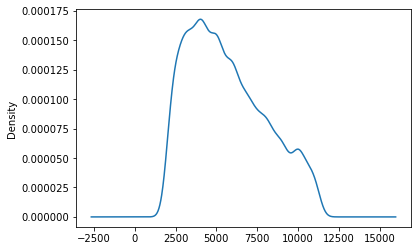

In [106]:
df['MonthlyIncome'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

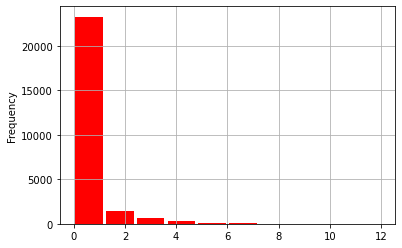

In [107]:
df['retard_30_59_jours'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='red')

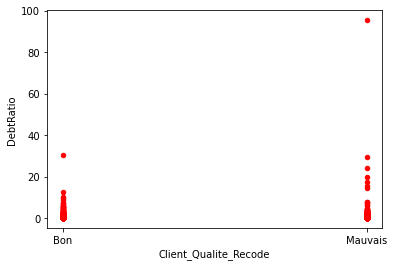

In [108]:
ax1=df.plot.scatter(x='Client_Qualite_Recode',y='DebtRatio', c='Red')


Commentaires sur le 1er graphique
- Le 1er graphique représente la distribution de probabilité de la variable Monthly Income. La distribution des revenus n'est pas uniforme parmi les clients. L'asymétrie dans la distribution montre qu'il y a probablement des inégalités parmi les clients. Après 5000, la distribution chute rapidement, ce qui veut dire que la majorité des clients ont un faible revenu.

Commentaires sur le 2ème graphique
- La majorité des clients ont accumulé entre 0 et 2 fois des retards entre 30-59 jours. Après 2 fois, la distribution chute fortement.

Commentaires sur le 3ème graphique (Croisement entre 2 colonnes)
- Les mauvais clients ont un ratio d'endettement beaucoup plus élevé que les bons clients.

CONCLUSION 

- Les données viennent de  Kaggle et concernent le credit Scoring 
- Nous avons passé en revue les données pour une vue globale 
- Le plus gros travail a été la phase de traitement des données\
    1.Nous avons du redéfinir le nom de certaines variables pour une meilleure compréhension\
    2.Nous avons traité les outliers et les valeurs manquantes\
    3.Nous avons discretisé deux variables (age et nombre de personnes à charge) pour renforcer les analyses
-  Nous avons fait une analyse descriptive pour les variables continues et catégorielles 
- Nous avons fait des croisement pour faire ressortir la relation entre les caracteristiques des clients et leur qualité concernant les crédits 
- Nous avons aussi fait des graphes soit de manière ponctuelle au besoin, soit pour établir des relations entre les variables.  

---